<a href="https://colab.research.google.com/github/Azevedo1996/Analise-de-dados/blob/main/Analisando_a%C3%A7%C3%B5es_com_dados_em_tempo_real_utilizando_a_biblioteca_YFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando a biblioteca YFinance
Para obtenção de dados de ações diretamente do Yahoo Finanças.

In [1]:
!pip install yfinance --upgrade --no-cache-dir

# Importando as bibliotecas necessarias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
import plotly
import plotly.offline as py
import seaborn as sns

Sobrescrevendo os métodos do pandas_datareader

In [3]:
yf.pdr_override()

# Obtendo os dados do mercado

Baixando as cotações do Yahoo Finance para o Índice Bovespa

In [4]:
ibov = web.get_data_yahoo('^BVSP')

[*********************100%***********************]  1 of 1 completed


In [5]:
ibov = ibov

Exibindo as cotações mais antigas

In [6]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0
1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0
1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0


Exibindo as cotações mais recentes

In [7]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-28,119082.000000,119444.00000,118061.000000,118738.0000,118738.0000,9167700
2022-03-29,118740.000000,120900.00000,118740.000000,120014.0000,120014.0000,12931900
2022-03-30,120013.000000,120531.00000,119775.000000,120260.0000,120260.0000,10893300
2022-03-31,120261.000000,120880.00000,119999.000000,119999.0000,119999.0000,11202100
2022-04-01,120001.023438,121578.84375,120001.023438,121552.8125,121552.8125,0


# Plotando o gráfico com o preços de fechamento do Índice Bovespa

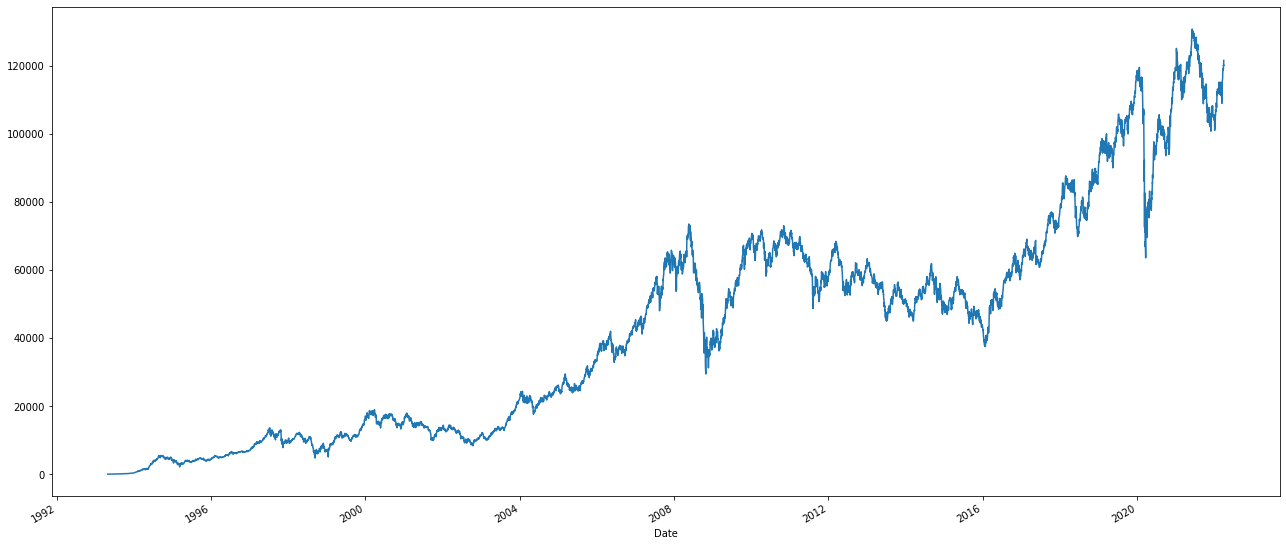

In [8]:
# Visualizando o grafico de preço de fechamento.
ibov["Close"].plot(figsize=(22,10));

# Obtendo volume de transação ações

In [9]:
tickers = "BBAS3.SA BBDC4.SA ITUB3.SA SANB11.SA BIDI11.SA BRSR6.SA MODL11.SA BPAN4.SA "
carteira = yf.download(tickers)["Volume"]
carteira_fechamento = yf.download(tickers, period="10y")["Close"]

[*********************100%***********************]  8 of 8 completed
[*********************100%***********************]  8 of 8 completed


# Resultados


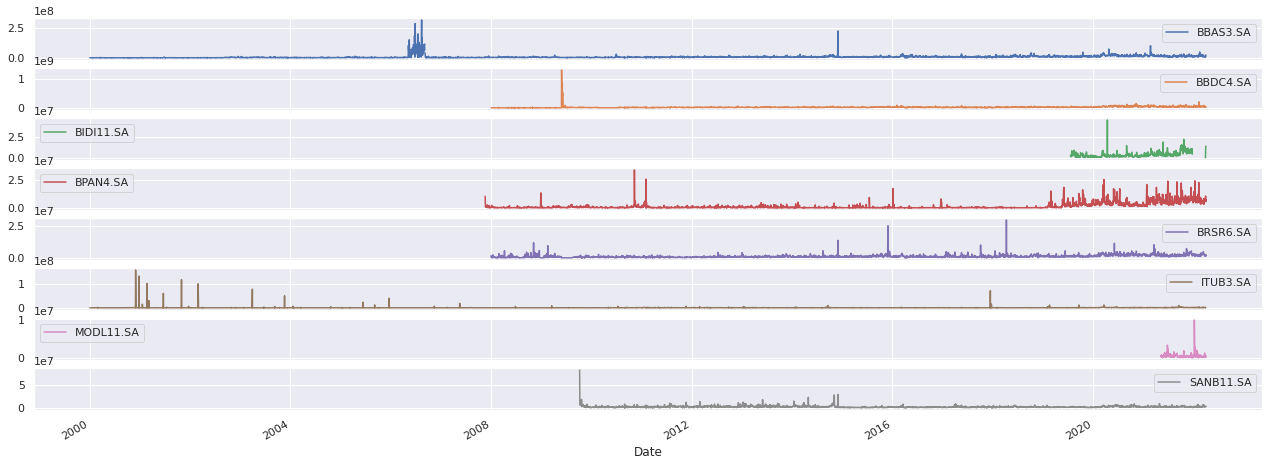

In [10]:
# Grafico comparando o volume de transações das ações desde seu IPO.
sns.set()
carteira.plot(subplots=True, figsize=(22,8));

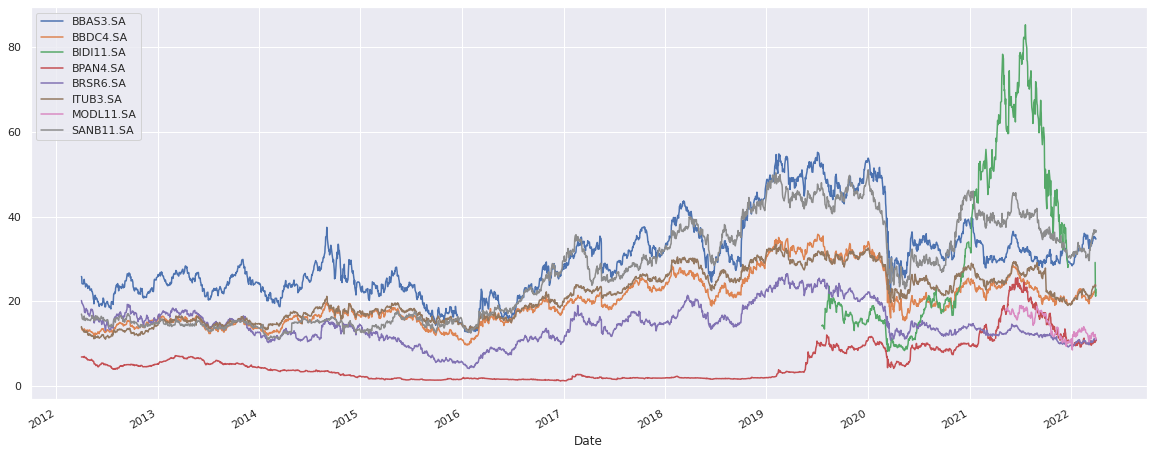

In [11]:
# Grafico comparando o fechamento das ações no periodo de 10 anos.
sns.set()
carteira_fechamento.plot(figsize=(20,8));

In [12]:
retorno = carteira_fechamento.pct_change()
retorno

,BBAS3.SA,BBDC4.SA,BIDI11.SA,BPAN4.SA,BRSR6.SA,ITUB3.SA,MODL11.SA,SANB11.SA
Date,,,,,,,,
2012-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-03,-0.005029,-0.008755,NaN,0.000000,-0.017839,-0.025658,NaN,-0.013545
2012-04-04,-0.059098,-0.025237,NaN,-0.002920,-0.015136,-0.007000,NaN,-0.017910
2012-04-05,-0.002893,-0.006473,NaN,0.007321,-0.001025,-0.009735,NaN,-0.035866
2012-04-09,-0.002072,-0.005212,NaN,-0.004360,-0.027692,-0.024068,NaN,-0.013241
...,...,...,...,...,...,...,...,...
2022-03-28,-0.009632,-0.004937,0.000000,-0.032988,-0.008079,-0.000427,0.002564,-0.015447
2022-03-29,0.004291,0.018042,0.018150,0.011696,0.018100,0.020922,0.037511,0.002202
2022-03-30,-0.005981,-0.006203,-0.263627,0.056840,-0.016889,0.000418,-0.059984,0.010162


In [13]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,BBAS3.SA,BBDC4.SA,BIDI11.SA,BPAN4.SA,BRSR6.SA,ITUB3.SA,MODL11.SA,SANB11.SA
Date,,,,,,,,
2012-04-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012-04-03,0.994971,0.991245,NaN,1.000000,0.982161,0.974342,NaN,0.986455
2012-04-04,0.936170,0.966229,NaN,0.997080,0.967294,0.967522,NaN,0.968787
2012-04-05,0.933462,0.959975,NaN,1.004380,0.966303,0.958103,NaN,0.934040
2012-04-09,0.931528,0.954972,NaN,1.000000,0.939544,0.935044,NaN,0.921673
...,...,...,...,...,...,...,...,...
2022-03-28,1.352418,1.607730,2.014945,1.497810,0.547572,1.670472,0.658989,2.139576
2022-03-29,1.358221,1.636737,2.051516,1.515329,0.557483,1.705422,0.683708,2.144287
2022-03-30,1.350097,1.626585,1.510681,1.601460,0.548067,1.706135,0.642697,2.166078


In [14]:
carteira_fechamento = 10000 * retorno_acumulado.iloc[:, :5]
carteira_fechamento["saldo"] = carteira_fechamento.sum(axis=1)
carteira_fechamento["retorno"] = carteira_fechamento["saldo"].pct_change()
carteira_fechamento

,BBAS3.SA,BBDC4.SA,BIDI11.SA,BPAN4.SA,BRSR6.SA,saldo,retorno
Date,,,,,,,
2012-04-02,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2012-04-03,9949.709452,9912.445627,NaN,10000.000000,9821.605250,39683.760330,-0.206325
2012-04-04,9361.702285,9662.289190,NaN,9970.802947,9672.943589,38667.738011,-0.025603
2012-04-05,9334.622362,9599.749562,NaN,10043.795927,9663.032560,38641.200411,-0.000686
2012-04-09,9315.280297,9549.718690,NaN,10000.000000,9395.440435,38260.439422,-0.009854
...,...,...,...,...,...,...,...
2022-03-28,13524.177396,16077.302131,20149.447578,14978.102732,5475.718545,70204.748383,-0.010805
2022-03-29,13582.205065,16367.374964,20515.162137,15153.285050,5574.826477,71192.853691,0.014075
2022-03-30,13500.967509,16265.849818,15106.810838,16014.599153,5480.674060,66368.901378,-0.067759


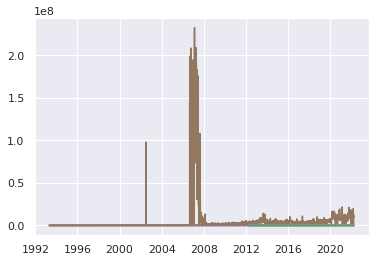

In [15]:
fig, ax = plt.subplots()
ax.plot(ibov)
ax.plot(carteira_fechamento);